---
## **Local Binary Patterns (LBP) (13 points)**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

**Write a Python function to compute the LBP of a given grayscale image. Use the basic 8-neighbor LBP method. Compute the histograms on minimum three different images**

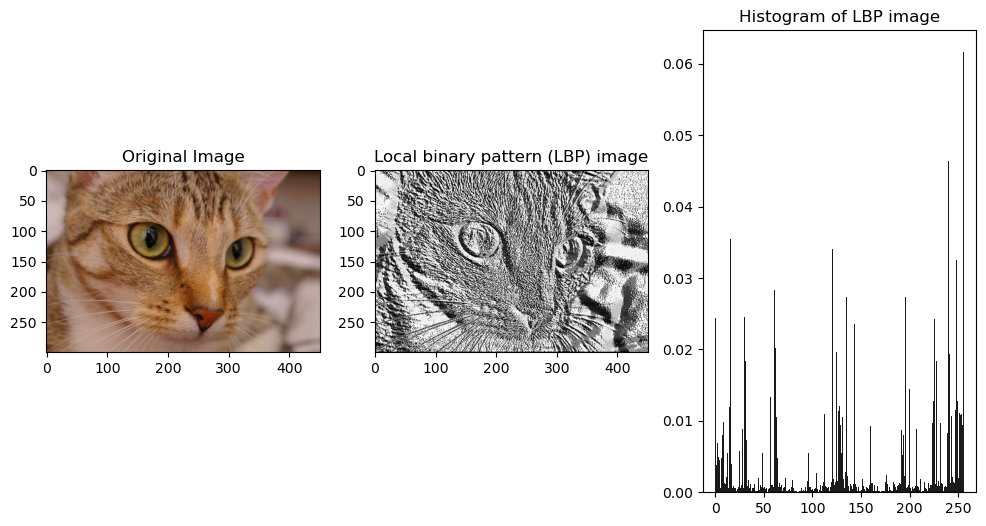

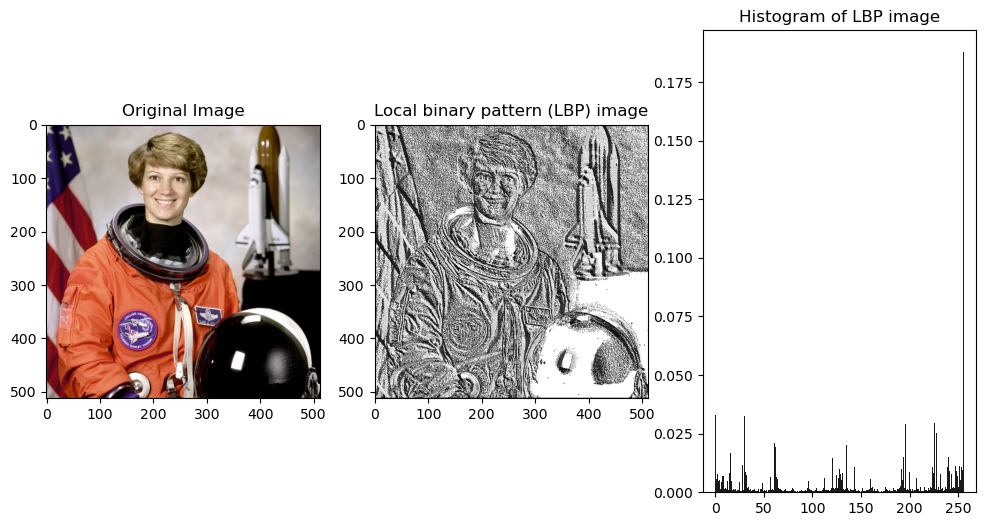

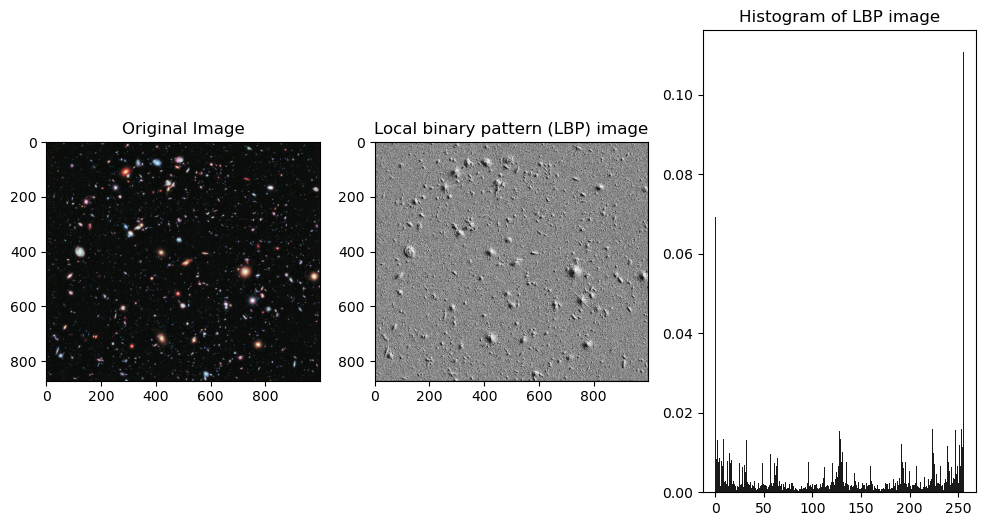

In [4]:
# local Binary Patterns
def get_pixel(img, center, x, y):
    new_value = 0
      
    try:
        # If local neighbourhood pixel value is greater than or equal
        # to center pixel values then set it to 1
        if img[x][y] >= center:
            new_value = 1      
    except:
        # Exception is required when neighbourhood value of a center
        # pixel value is null i.e. values present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
    val_ar = []
    val = 0.0

    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Convert binary values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

def histo_gram(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5')

images = [data.chelsea(), data.astronaut(), data.hubble_deep_field()]

for img in images:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width = img_gray.shape
    lbp_img = np.zeros((height, width), np.uint8)
    
    for i in range(0, height):
        for j in range(0, width):
            lbp_img[i, j] = lbp_calculated_pixel(img_gray, i, j)

    hist, bin = np.histogram(lbp_img.ravel(), 256, [0,255])
    #histo = histo_gram(lbp_img)
    # Plot the results
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    
    # Plot original image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    #axes[0].axis('off')

    # Plot LBP image
    axes[1].imshow(lbp_img, cmap='grey')
    axes[1].set_title('Local binary pattern (LBP) image')
    #axes[1].axis('off')

    # Plot histogram
    n_bins = 256
    axes[2].hist(
        lbp_img.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.1')
    axes[2].set_title('Histogram of LBP image')
    #axes[2].axis('off')

    plt.show()

**Explain what the histogram represents in terms of the texture features of the image**
<br>
In general terms the histogram of local binary pattern images (LBP) captures the frequency of occurence of different patterns and textures in the image. Textures with distinct patterns will result in histograms with prominent peaks at specific LBP values, while homogeneous textures result in more uniform histograms. It can highlight features like spots, line endings, edges and corners. Thus by comparing histograms from different images we can assess similarities and differences in texture, which is useful in say face recognition and texture classification. The local binary pattern algorithm is usually a pre-processing stage where its output becomes the input data for some machine learning model, such as support vector machines (SVM).Using the basic LBP method of 8 surrounding pixels we have a total of $2^8=256$ possible combinations of LBP codes, thus a 256-bin histogram is sufficient to assess the final LBP-codes feature vector.

**Compare and discuss differences in histograms and what they tell you about the textures of he three LBP images**
<br>
The LBP histograms of the astronaut and universe images are somewhat different from the cat image. The cat image shows a LBP histogram with many distinct spikes, while the two others images have more uniform distrubutions. This cat photo has many close up and distinct visual features with its striped fur, which may explain the spiky histogram. The female astronaut image contains many large areas of monotone colors black, white and orange, and may explain why the corresponding histogram has fewer and smaller spikes. We see similar uniform LBP histogram for the Hubble deep field image which is fairly even in color/intensity as it is largely black background, the LBP code around zero as the most prominent peak, zero means the darkest shade of gray (black) and represent featureless content of the image. It should be noted that experimenting with different number of bins the resulting histograms will change characteristics accordingly. 